### 목표
- 호준씨, 지현씨 얼굴을 분류하는 이진 분류 신경망 모델을 만들어보자!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PIL : Python Imaging Library(이미지 처리 라이브러리)
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터비즈니스 과정


In [ ]:
# 이미지를 불러와서 흑백으로 변환
# convert -> : 흑백, RGB : 컬
img = Image.open("data/Class 1-samples/0.jpg").convert("L")
img

In [7]:
# 불러온 이미지 데이터를 numpy 배열로 변환(기계가 인식할 수 있도록 이미지를 수치 데이터로 변환시키는 과정)
# 가로(행), 세로(열) 픽셀수로 변경됨
# 학습용 데이터들은 사전에 다 수치데이터로 변환되어져 있던 상태

img_array = np.array(img)

In [8]:
img_array.shape

(224, 224)

In [9]:
img_array

array([[159, 159, 160, ..., 139, 139, 138],
       [159, 160, 160, ..., 141, 139, 138],
       [159, 160, 160, ..., 142, 140, 139],
       ...,
       [138, 137, 137, ..., 119, 118, 118],
       [137, 136, 136, ..., 118, 118, 118],
       [136, 135, 135, ..., 118, 118, 119]], dtype=uint8)

### 호준씨, 지현씨 각각 200장씩의 데이터를 전부 수치데이터로 변환시켜보자!

In [14]:
from tqdm import tqdm

In [19]:
# 데이터셋 구성하기
class1_list = [] # 200장의 호준씨 데이터가 저장될 자리
class2_list = [] # 200장의 지현씨 데이터가 저장될 자리

for i in tqdm(range(0, 200, 1)) :
  # 1. 호준씨 데이터 작업
  # 경로와 파일명에 맞게 이미지를 가져와서 흑백으로 변환 후 img1 변수에 담아주기
  img1 = Image.open(f"data/Class 1-samples/{i}.jpg").convert("L")
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  class1_list.append(np.array(img1))

    # 2. 지현씨 데이터 작업
  # 경로와 파일명에 맞게 이미지를 가져와서 흑백으로 변환 후 img1 변수에 담아주기
  img2 = Image.open(f"data/Class 2-samples/{i}.jpg").convert("L")
  # 이미지 데이터가 저장된 img1을 numpy 배열로 변환
  class2_list.append(np.array(img2))

100%|██████████| 200/200 [03:42<00:00,  1.11s/it]


In [20]:
# 리스트를 기계학습에 바로 사용할 수 없기 때문에 numpy 배열로 변환시켜주기
# 이미지 하나하나도 배열로, 이를 담고 있는 리스트 자체도 배열로 변
class1_array = np.array(class1_list)
class2_array = np.array(class2_list)

In [21]:
class1_array.shape, class2_array.shape

((200, 224, 224), (200, 224, 224))

In [22]:
# 두개의 배열 합치기(문제 데이터 생성)
data = np.concatenate([class1_array, class2_array])

In [23]:
data.shape

(400, 224, 224)

In [24]:
# 정답 데이터 만들기(문제와 정답의 순서를 일치시켜줘야함)
# 0 : 호준씨, 1 : 지현씨
target = np.array([0]*200 + [1]*200)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
# 학습, 평가 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 224, 224)
(80, 224, 224)
(320,)
(80,)


In [74]:
model = Sequential()

model.add(Flatten(input_shape=(224, 224)))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 50176)             0         
                                                                 
 dense_70 (Dense)            (None, 800)               40141600  
                                                                 
 dense_71 (Dense)            (None, 400)               320400    
                                                                 
 dense_72 (Dense)            (None, 200)               80200     
                                                                 
 dense_73 (Dense)            (None, 100)               20100     
                                                                 
 dense_74 (Dense)            (None, 10)                1010      
                                                                 
 dense_75 (Dense)            (None, 1)               

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

In [76]:
h = model.fit(X_train, y_train, epochs=100,
              validation_split=0.2)
# validation_split : 신경망 학습시 자동으로 train데이터에서 val데이터를 분리시켜주는 명령
# 주의점 : 뒤에서부터 일정 %를 잘라주기 때문에 랜덤하게 샘플링되어 있는 데이터에만 사용할것

Epoch 1/100
8/8 [==============================] - 3s 36ms/step - loss: 3874.7302 - acc: 0.4805 - val_loss: 243.7760 - val_acc: 0.4844
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 2409.8918 - acc: 0.4648 - val_loss: 464.4935 - val_acc: 0.5156
Epoch 3/100
8/8 [==============================] - 0s 19ms/step - loss: 244.5747 - acc: 0.6680 - val_loss: 393.9665 - val_acc: 0.4844
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 381.1040 - acc: 0.5273 - val_loss: 60.6522 - val_acc: 0.6406
Epoch 5/100
8/8 [==============================] - 0s 18ms/step - loss: 39.4767 - acc: 0.8242 - val_loss: 2.0997e-15 - val_acc: 1.0000
Epoch 6/100
8/8 [==============================] - 0s 21ms/step - loss: 0.7854 - acc: 0.9883 - val_loss: 0.0000e+00 - val_acc: 1.0000
Epoch 7/100
8/8 [==============================] - 0s 18ms/step - loss: 5.7135 - acc: 0.9336 - val_loss: 1.2639 - val_acc: 0.9688
Epoch 8/100
8/8 [==============================] - 0s 19ms/step 

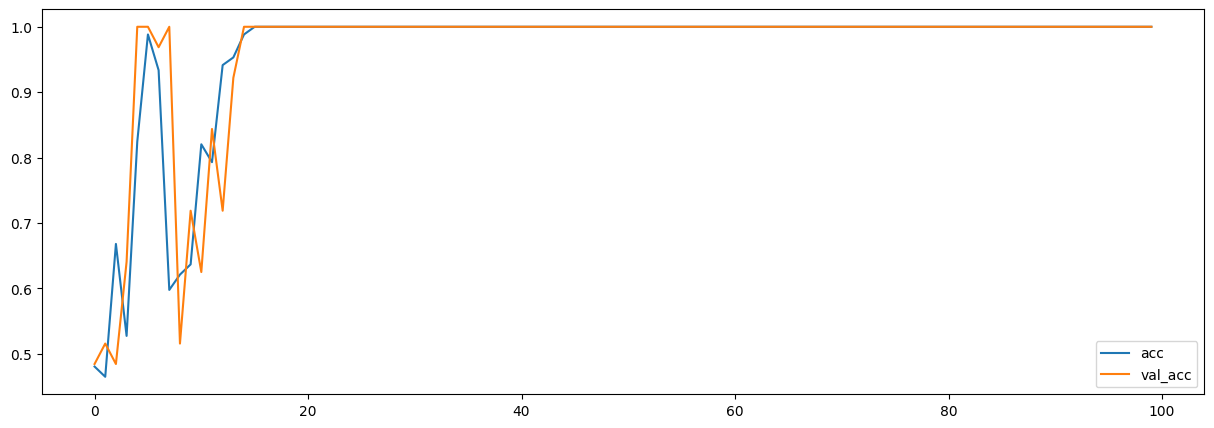

In [77]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')

plt.legend()
plt.show()

In [78]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - acc: 1.0000


[0.0, 1.0]

### 학습과 검증에 사용한 데이터 자체가 고정된 각도에서 큰 변동이 없는 상태로 찍혀진 사진이었기 때문에 기계입장에서는 쉽게 인식이 되고 분류할 수 있었던 문제